In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import requests
from datetime import datetime
import re
from collections import Counter
import math
from tqdm import tqdm

# setting pandas
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

# setting seaborn
sns.set_palette('Spectral')
sns.set_context('notebook', font_scale=1)
sns.set_style('whitegrid')
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})

warnings.filterwarnings('ignore')

In [13]:
files = [
    './data kotor cico/cico.xlsx'
]

_ = []
for i in files:
    n = pd.read_excel(i)
    _.append(n)

df = pd.concat(_)

In [14]:
df['id_unit'] = df['id_unit'].apply(lambda x: 'DT-' + ''.join(str(x).upper().split('*')).split()[-1])

In [15]:
def retext_project(x):
    if x in ['Rental BDM','Rental BDM Stockpile','Feeding']:
        msg = 'Rental BDM'
    else:
        msg = x
    return msg

df['kontrak'] = df['kontrak'].apply(retext_project)

In [16]:
# def retext_date(x):
#     x = str(x).split()[0]
#     years = str(x).split('-')[0]
#     month = str(x).split('-')[1]
#     day = str(x).split('-')[2]
#     date = month + '/' + day + '/' + years
#     return date

# df['date'] = df['date'].apply(retext_date)
df['date'] = pd.to_datetime(df['date'])

In [18]:
def retext_time(x):
    time = ':'.join(str(x).split(':')[:2])
    return time

df['check_in'] = df['check_in'].apply(retext_time)
df['check_out'] = df['check_out'].apply(retext_time)

In [19]:
df['keterangan'] = df['keterangan'].apply(lambda x: str(x).upper())

In [20]:
df.to_excel('./data kotor cico/cico python.xlsx', index=False)

In [22]:
df['check_out2'] = df.check_out.apply(lambda x: str(x).split(':')[0])

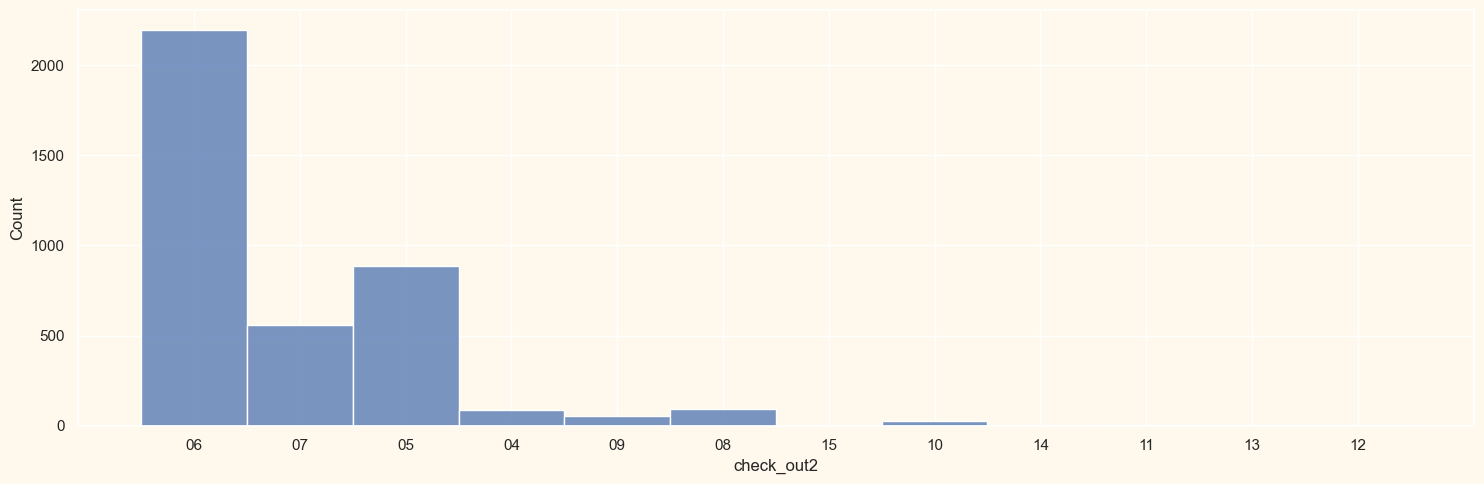

In [25]:
plt.figure(figsize=(15, 5))
sns.histplot(df.check_out2)
plt.tight_layout()
plt.show()